In [1]:
%cd ..

/home/zephy_manjaro/My-Workspace/Code/others/ai4vn2022-air-quality-forecasting


In [2]:
# Import relevant items
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

In [4]:
df = pd.read_csv('data/raw/data-train/input/S0000137-Ngoc Khanh.csv')


In [5]:
print(df.head())
print(df.columns)


   Unnamed: 0         timestamp  PM2.5  humidity  temperature
0           0  27/05/2020 12:00  23.66     64.09        29.96
1           1  27/05/2020 13:00  23.08     63.05        30.07
2           2  27/05/2020 14:00  25.68     67.51        29.77
3           3  27/05/2020 15:00  26.37     71.17        29.11
4           4  27/05/2020 16:00  27.57     71.60        29.08
Index(['Unnamed: 0', 'timestamp', 'PM2.5', 'humidity', 'temperature'], dtype='object')


In [6]:
df.dtypes


Unnamed: 0       int64
timestamp       object
PM2.5          float64
humidity       float64
temperature    float64
dtype: object

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])



## Visualize Features

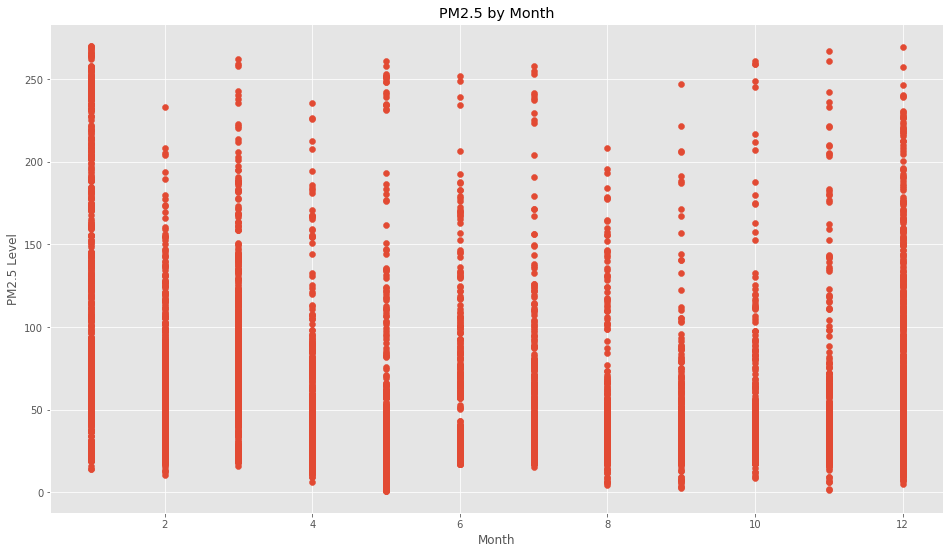

In [8]:
x = df['timestamp'].dt.month
y = df['PM2.5']

plt.scatter(x, y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()



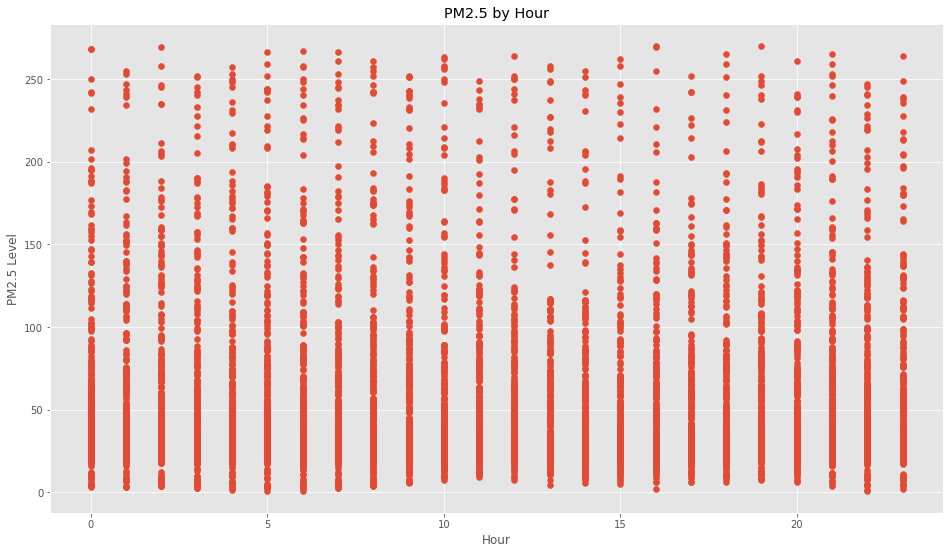

In [9]:
x = df['timestamp'].dt.hour
y = df['PM2.5']

plt.scatter(x, y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()


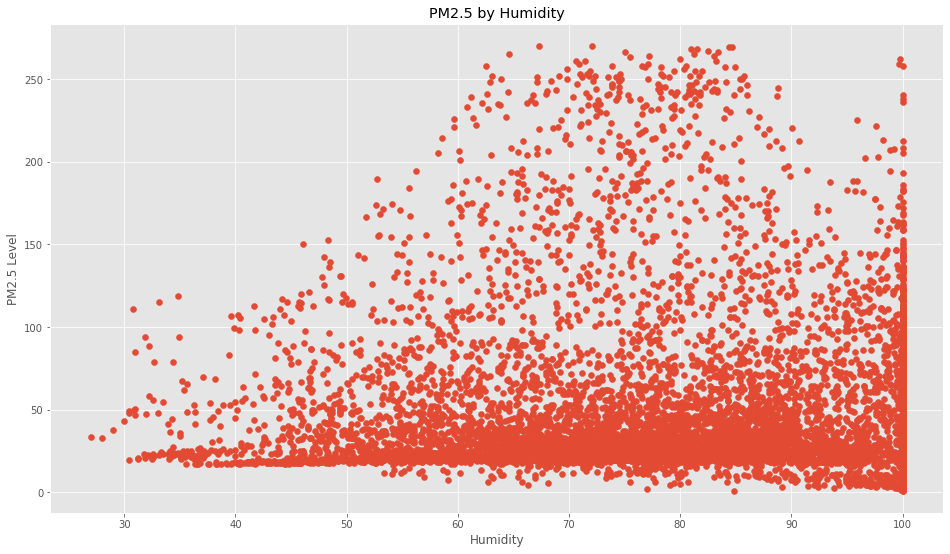

In [10]:
x = df['humidity']
y = df['PM2.5']

plt.scatter(x, y)
plt.xlabel('Humidity')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Humidity')
plt.show()


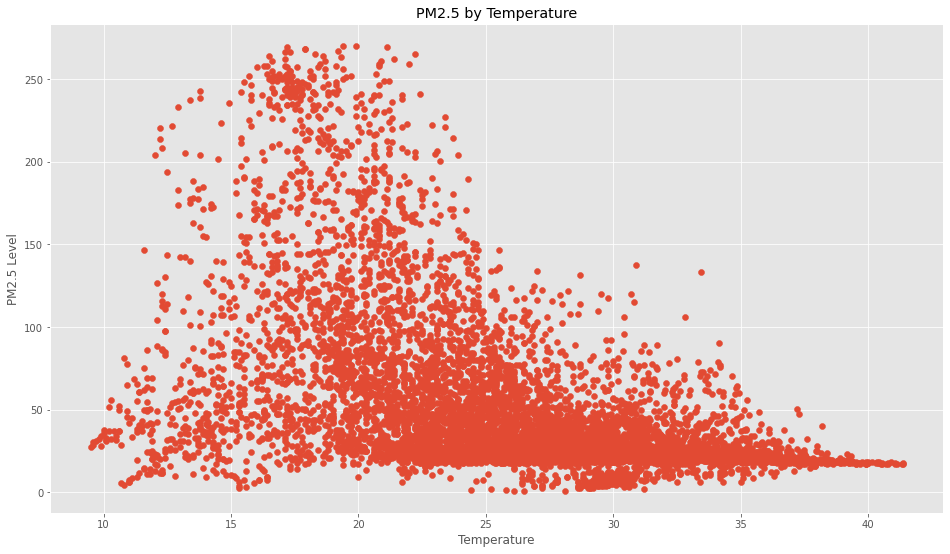

In [11]:
x = df['temperature']
y = df['PM2.5']

plt.scatter(x, y)
plt.xlabel('Temperature')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Temperature')
plt.show()


In [12]:
def time_series(start, end):
    time_series_df = df
    time_series_df =  time_series_df[['timestamp', 'PM2.5']][(
        time_series_df['timestamp'] >= start) & (time_series_df['timestamp'] <= end)]
    x = time_series_df['timestamp']
    y = time_series_df['PM2.5']

    plt.plot(x, y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show()


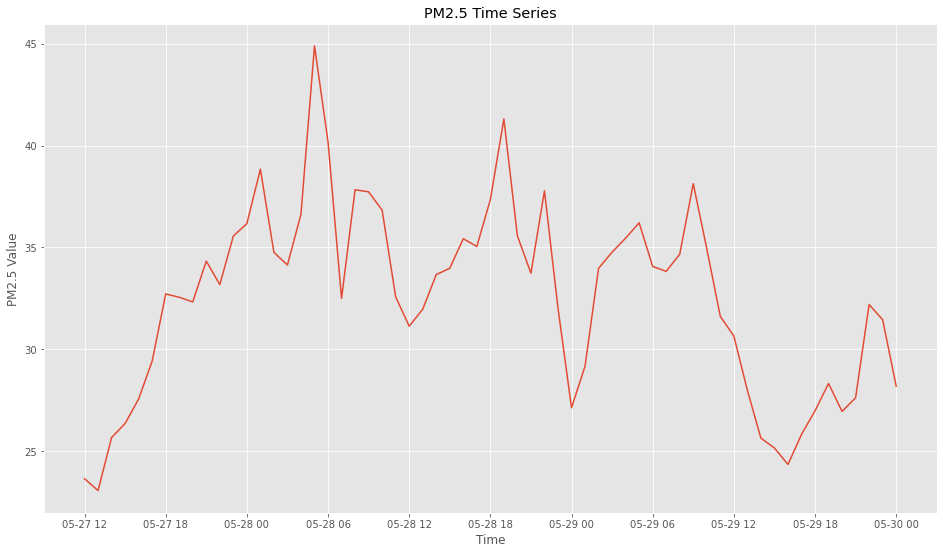

In [13]:
time_series('2020-05-27','2020-05-30')

### Handle NaNs

1. Check if there is NaN value

In [14]:
df.isnull().values.any()

True

In [15]:
df.describe()

,Unnamed: 0,PM2.5,humidity,temperature
count,9000.000000,8103.000000,8319.000000,8319.000000
mean,4499.500000,52.955317,76.995037,25.943735
std,2598.220545,49.680813,15.890115,6.021284
min,0.000000,1.080000,27.000000,9.500000
25%,2249.750000,22.380000,66.300000,21.800000
50%,4499.500000,32.000000,78.400000,26.200000
75%,6749.250000,63.750000,89.400000,30.200000
max,8999.000000,270.000000,100.000000,43.400000


2. Show rows where any cell has a NaN

In [16]:

df[df.isnull().any(axis=1)].shape


(897, 5)

In [17]:
df.shape

(9000, 5)

3. Drop any row where Value is NaN

In [18]:
df[df['PM2.5'].isnull()]


,Unnamed: 0,timestamp,PM2.5,humidity,temperature
715,715,2020-06-26 07:00:00,NaN,NaN,NaN
716,716,2020-06-26 08:00:00,NaN,NaN,NaN
742,742,2020-06-27 10:00:00,NaN,NaN,NaN
743,743,2020-06-27 11:00:00,NaN,NaN,NaN
744,744,2020-06-27 12:00:00,NaN,NaN,NaN
...,...,...,...,...,...
8995,8995,2021-06-06 07:00:00,NaN,NaN,NaN
8996,8996,2021-06-06 08:00:00,NaN,NaN,NaN
8997,8997,2021-06-06 09:00:00,NaN,NaN,NaN
8998,8998,2021-06-06 10:00:00,NaN,NaN,NaN


In [19]:
df = df.dropna(axis=0, subset=['PM2.5'])
df.shape


(8103, 5)

4. Reset index

In [20]:
# Remove first column
df = df.iloc[:, 1:]


In [21]:
df = df.reset_index(drop=True)


In [22]:
df.head(5)

,timestamp,PM2.5,humidity,temperature
0,2020-05-27 12:00:00,23.66,64.09,29.96
1,2020-05-27 13:00:00,23.08,63.05,30.07
2,2020-05-27 14:00:00,25.68,67.51,29.77
3,2020-05-27 15:00:00,26.37,71.17,29.11
4,2020-05-27 16:00:00,27.57,71.60,29.08


### Visualizing cleaned features & correlation

Pair Scatter

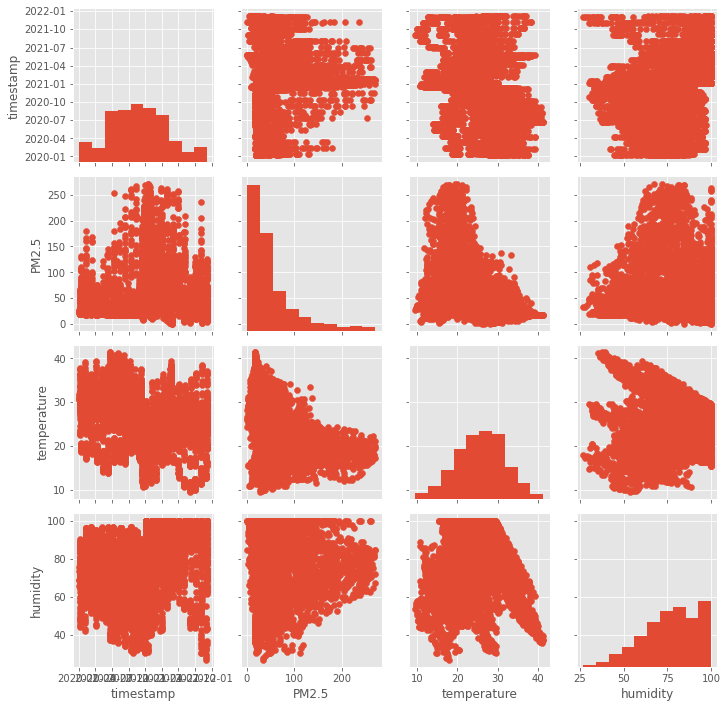

In [23]:
g = sns.PairGrid(df, vars=["timestamp", "PM2.5", "temperature",
                 "humidity"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


In [24]:
# Clone df with more feature of year, month, day, hour
_df = pd.concat([
    df, df['timestamp'].dt.year,
    df['timestamp'].dt.month,
    df['timestamp'].dt.day,
    df['timestamp'].dt.hour], axis=1)

_df.columns = ['timestamp', 'PM2.5', 'humidity',
               'temperature',  'year', 'month', 'day', 'hour']


Visualize the distribution of PM2.5 value by month, hour

In [25]:
def visualize_distribution_featue(feature):
    g = sns.FacetGrid(_df, col=feature, col_wrap=4)
    g.map(sns.histplot, 'PM2.5')
    plt.show()


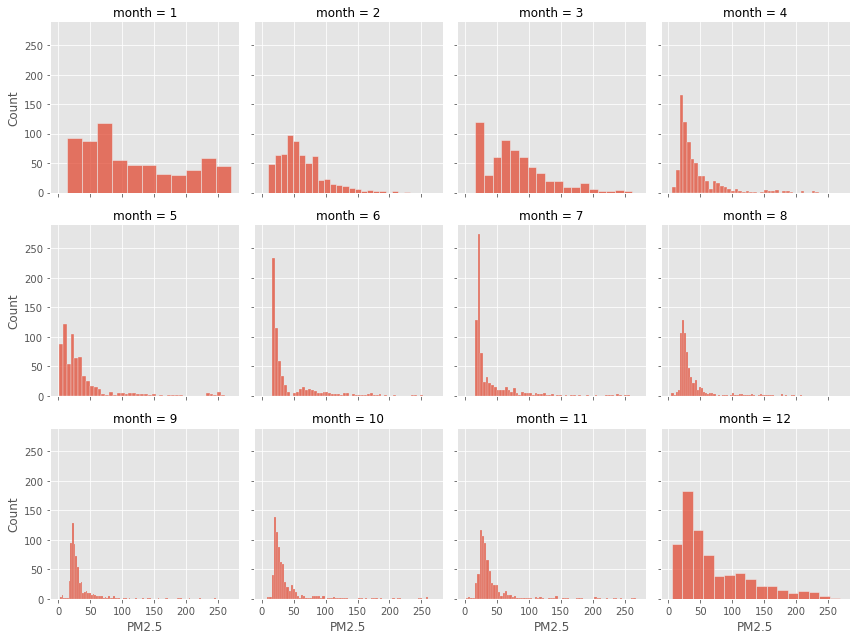

In [26]:
visualize_distribution_featue('month')

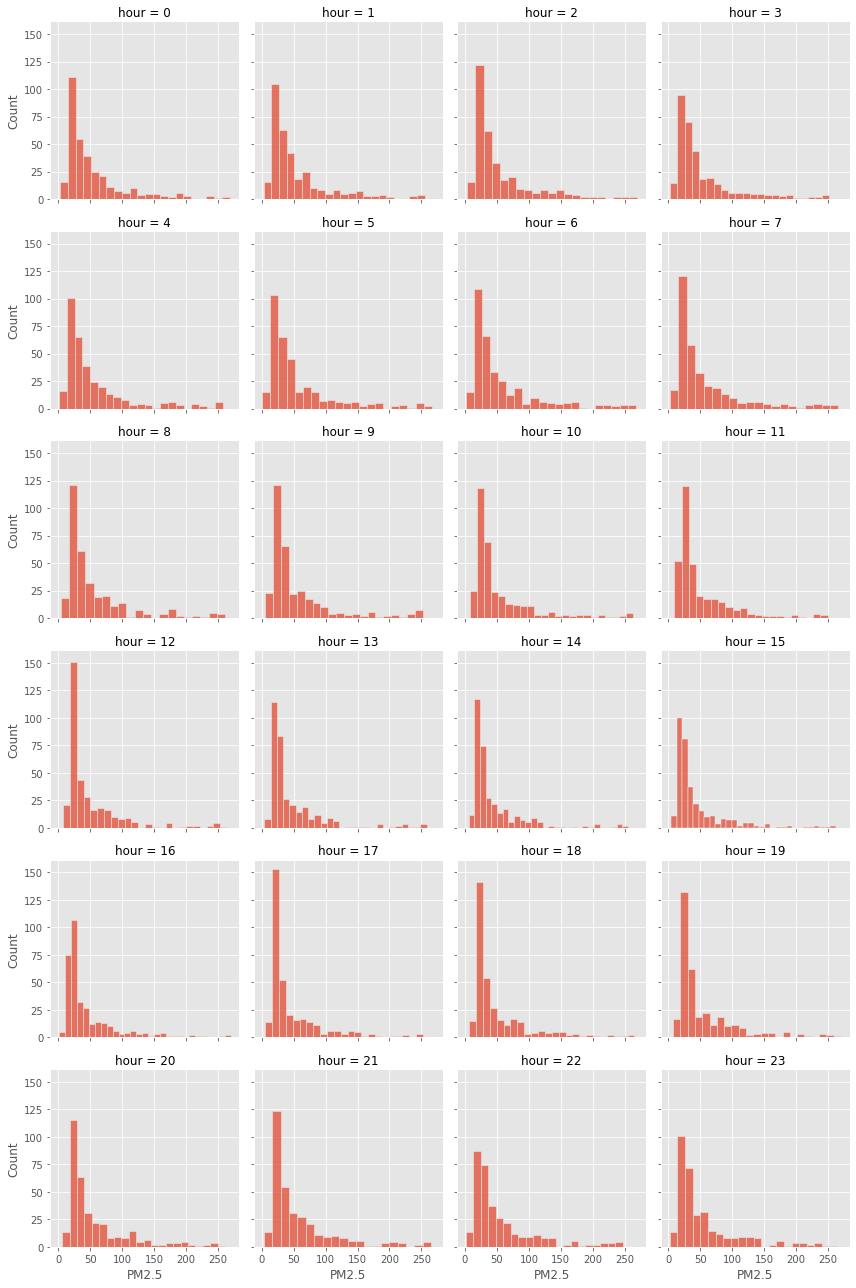

In [27]:
visualize_distribution_featue('hour')


Correlation

<AxesSubplot:>

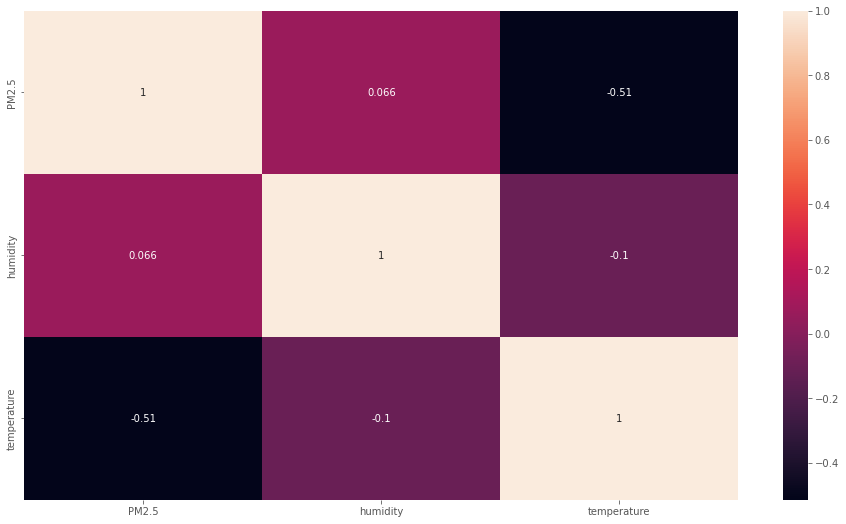

In [28]:
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
